In [44]:
# import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = (12, 8)
import seaborn as sns
import datetime


In [45]:
# Reading the dataset

df = pd.read_csv('covid19data.csv')

# Showing the first 5 rows
df.head(5)   

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [46]:
# looking the column names

df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [47]:
# checking the number of rows and columns in the dataset

df.shape

# as we see there are 349980 rows and 67 columns in the data

(349980, 67)

In [48]:
# selecting the appropriate columns for our analysis

df = df[['iso_code', 'continent', 'location', 'date','population', 'total_cases', 'new_cases',
         'total_deaths', 'new_deaths','total_tests', 'new_tests','total_vaccinations','people_vaccinated', 
         'people_fully_vaccinated', 'total_boosters','new_vaccinations','population_density']]
df.head()

,iso_code,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population_density
0,AFG,Asia,Afghanistan,2020-01-03,41128772.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422
1,AFG,Asia,Afghanistan,2020-01-04,41128772.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422
2,AFG,Asia,Afghanistan,2020-01-05,41128772.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422
3,AFG,Asia,Afghanistan,2020-01-06,41128772.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422
4,AFG,Asia,Afghanistan,2020-01-07,41128772.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422


In [49]:
# Generate descriptive statistics for numeric data.

df.describe()

# to include all data we can use df.describe(include = 'all')

,population,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population_density
count,3.499800e+05,3.120880e+05,3.404570e+05,2.905010e+05,340511.000000,7.938700e+04,7.540300e+04,7.921500e+04,7.582500e+04,7.248200e+04,4.747700e+04,6.526300e+04,297113.000000
mean,1.281621e+08,6.683354e+06,9.601634e+03,8.602180e+04,85.511055,2.110457e+07,6.728541e+04,4.436961e+08,1.970839e+08,1.795635e+08,1.142071e+08,8.016065e+05,403.365519
std,6.597522e+08,4.068903e+07,1.102769e+05,4.398873e+05,613.687971,8.409869e+07,2.477340e+05,1.585591e+09,6.961862e+08,6.404328e+08,3.692164e+08,3.311413e+06,1838.033799
min,4.700000e+01,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.137000
25%,4.490020e+05,8.090000e+03,0.000000e+00,1.270000e+02,0.000000,3.646540e+05,2.244000e+03,1.656201e+06,9.007120e+05,8.440315e+05,4.574500e+05,2.628000e+03,37.728000
50%,5.882259e+06,7.020500e+04,2.000000e+00,1.328000e+03,0.000000,2.067330e+06,8.783000e+03,1.193231e+07,6.099227e+06,5.580563e+06,4.377439e+06,2.491100e+04,90.672000
75%,2.830170e+07,7.409558e+05,2.640000e+02,1.192200e+04,3.000000,1.024845e+07,3.722900e+04,9.391628e+07,4.471268e+07,4.153335e+07,3.290694e+07,2.075630e+05,222.873000
max,7.975105e+09,7.714071e+08,8.401961e+06,6.972139e+06,27939.000000,9.214000e+09,3.585563e+07,1.351500e+10,5.625687e+09,5.173179e+09,2.795820e+09,4.967303e+07,20546.766000


In [50]:
# checking the data types of our variables

df.dtypes

iso_code                    object
continent                   object
location                    object
date                        object
population                 float64
total_cases                float64
new_cases                  float64
total_deaths               float64
new_deaths                 float64
total_tests                float64
new_tests                  float64
total_vaccinations         float64
people_vaccinated          float64
people_fully_vaccinated    float64
total_boosters             float64
new_vaccinations           float64
population_density         float64
dtype: object

In [51]:
# checking the missing data

df.isna().sum()

iso_code                        0
continent                   16620
location                        0
date                            0
population                      0
total_cases                 37892
new_cases                    9523
total_deaths                59479
new_deaths                   9469
total_tests                270593
new_tests                  274577
total_vaccinations         270765
people_vaccinated          274155
people_fully_vaccinated    277498
total_boosters             302503
new_vaccinations           284717
population_density          52867
dtype: int64

In [52]:
# creating For Loop to fill the missing data of the columns selected to 0
# List of columns to fill missing data in
columns_to_fill = ['population',
       'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_tests',
       'new_tests', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_boosters', 'new_vaccinations']

# Iterate through the columns and fill missing data with 0
for column in columns_to_fill:
    df[column].fillna(0, inplace=True)

# Print the DataFrame
df


,iso_code,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population_density
0,AFG,Asia,Afghanistan,2020-01-03,41128772.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.422
1,AFG,Asia,Afghanistan,2020-01-04,41128772.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.422
2,AFG,Asia,Afghanistan,2020-01-05,41128772.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.422
3,AFG,Asia,Afghanistan,2020-01-06,41128772.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.422
4,AFG,Asia,Afghanistan,2020-01-07,41128772.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349975,ZWE,Africa,Zimbabwe,2023-10-14,16320539.0,265808.0,0.0,5718.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.729
349976,ZWE,Africa,Zimbabwe,2023-10-15,16320539.0,265808.0,0.0,5718.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.729
349977,ZWE,Africa,Zimbabwe,2023-10-16,16320539.0,265808.0,0.0,5718.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.729
349978,ZWE,Africa,Zimbabwe,2023-10-17,16320539.0,265808.0,0.0,5718.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.729


In [53]:
# creating For Loop that changes the data type of each columns selected to "int64"
# List of columns to to change the data type

columns_to_process = [
    'population', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_tests',
    'new_tests', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
    'total_boosters', 'new_vaccinations'
]

# Fill missing data with 0 and change data type to int64
for column in columns_to_process:
    df[column] = df[column].astype('int64')

# Print the DataFrame with updated data types
df

,iso_code,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population_density
0,AFG,Asia,Afghanistan,2020-01-03,41128772,0,0,0,0,0,0,0,0,0,0,0,54.422
1,AFG,Asia,Afghanistan,2020-01-04,41128772,0,0,0,0,0,0,0,0,0,0,0,54.422
2,AFG,Asia,Afghanistan,2020-01-05,41128772,0,0,0,0,0,0,0,0,0,0,0,54.422
3,AFG,Asia,Afghanistan,2020-01-06,41128772,0,0,0,0,0,0,0,0,0,0,0,54.422
4,AFG,Asia,Afghanistan,2020-01-07,41128772,0,0,0,0,0,0,0,0,0,0,0,54.422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349975,ZWE,Africa,Zimbabwe,2023-10-14,16320539,265808,0,5718,0,0,0,0,0,0,0,0,42.729
349976,ZWE,Africa,Zimbabwe,2023-10-15,16320539,265808,0,5718,0,0,0,0,0,0,0,0,42.729
349977,ZWE,Africa,Zimbabwe,2023-10-16,16320539,265808,0,5718,0,0,0,0,0,0,0,0,42.729
349978,ZWE,Africa,Zimbabwe,2023-10-17,16320539,265808,0,5718,0,0,0,0,0,0,0,0,42.729


In [54]:
# checking again if the data types converted successfuly 
df.dtypes

iso_code                    object
continent                   object
location                    object
date                        object
population                   int64
total_cases                  int64
new_cases                    int64
total_deaths                 int64
new_deaths                   int64
total_tests                  int64
new_tests                    int64
total_vaccinations           int64
people_vaccinated            int64
people_fully_vaccinated      int64
total_boosters               int64
new_vaccinations             int64
population_density         float64
dtype: object

In [55]:
# Convert the 'date' to the Date data type

df['date'] = pd.to_datetime(df['date'])


In [56]:
# Extract the year and put it in a new 'year' column
df['year'] = df['date'].dt.year

In [57]:
df.year.head()

0    2020
1    2020
2    2020
3    2020
4    2020
Name: year, dtype: int64

In [58]:
# lets change the year column into string
df['year'] = df.year.astype('str')

In [59]:
# let's check duplicate rows in the data
df.duplicated().sum()  # there is now duplicate rows in the data as shown in the results

0

In [60]:
# changing the the column location column name to country

df.rename(columns = {'location':'country'}, inplace = True)

In [61]:
df.country.value_counts().sort_values(ascending = False)

Mexico                    1387
Argentina                 1387
Austria                   1385
British Virgin Islands    1385
Brazil                    1385
                          ... 
England                   1303
Wales                     1198
Macao                      795
Northern Cyprus            691
Western Sahara               1
Name: country, Length: 255, dtype: int64

In [62]:
# in some case there is total_death with no total cases that not possiple in real life
# so we if the total_cases is less than the total deaths we will you the total_deaths values as total_cases
# we restore data in the same total_cases column

df['total_cases'] = np.where(df['total_deaths'] > df['total_cases'],df['total_deaths'], df['total_cases'])

In [63]:
# let calculate the percentage population infected column
df['Per_pop_infected'] = (df['new_cases']/df['population'])*100
df.sort_values(by= 'Per_pop_infected', ascending = False)

,iso_code,continent,country,date,population,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population_density,year,Per_pop_infected
344069,WLF,Oceania,Wallis and Futuna,2022-10-14,11596,3415,2654,7,0,0,0,0,0,0,0,0,NaN,2022,22.887202
101886,FLK,South America,Falkland Islands,2022-05-13,3801,1126,734,0,0,0,0,0,0,0,0,0,NaN,2022,19.310708
261252,SHN,Africa,Saint Helena,2022-09-23,5401,1415,849,0,0,0,0,0,0,0,0,0,NaN,2022,15.719311
101897,FLK,South America,Falkland Islands,2022-05-24,3801,1608,482,0,0,0,0,0,0,0,0,0,NaN,2022,12.680873
266607,SPM,North America,Saint Pierre and Miquelon,2022-03-22,5885,1930,577,1,0,0,0,0,0,0,0,0,NaN,2022,9.804588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163717,KGZ,Asia,Kyrgyzstan,2021-03-21,6630621,0,0,0,0,0,0,0,0,0,0,0,32.333,2021,0.000000
163718,KGZ,Asia,Kyrgyzstan,2021-03-22,6630621,0,0,0,0,0,0,0,0,0,0,0,32.333,2021,0.000000
163719,KGZ,Asia,Kyrgyzstan,2021-03-23,6630621,0,0,0,0,0,0,0,0,0,0,0,32.333,2021,0.000000
163720,KGZ,Asia,Kyrgyzstan,2021-03-24,6630621,0,0,0,0,0,0,0,0,0,0,0,32.333,2021,0.000000


In [64]:
# let calculate the percentage total_deaths of daily total_cases infected 
df['per_deaths_of_cases'] = ((df['total_deaths']/df['total_cases'])*100)
df.sort_values(by= 'Per_pop_infected', ascending = False)

,iso_code,continent,country,date,population,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population_density,year,Per_pop_infected,per_deaths_of_cases
344069,WLF,Oceania,Wallis and Futuna,2022-10-14,11596,3415,2654,7,0,0,0,0,0,0,0,0,NaN,2022,22.887202,0.204978
101886,FLK,South America,Falkland Islands,2022-05-13,3801,1126,734,0,0,0,0,0,0,0,0,0,NaN,2022,19.310708,0.000000
261252,SHN,Africa,Saint Helena,2022-09-23,5401,1415,849,0,0,0,0,0,0,0,0,0,NaN,2022,15.719311,0.000000
101897,FLK,South America,Falkland Islands,2022-05-24,3801,1608,482,0,0,0,0,0,0,0,0,0,NaN,2022,12.680873,0.000000
266607,SPM,North America,Saint Pierre and Miquelon,2022-03-22,5885,1930,577,1,0,0,0,0,0,0,0,0,NaN,2022,9.804588,0.051813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163717,KGZ,Asia,Kyrgyzstan,2021-03-21,6630621,0,0,0,0,0,0,0,0,0,0,0,32.333,2021,0.000000,NaN
163718,KGZ,Asia,Kyrgyzstan,2021-03-22,6630621,0,0,0,0,0,0,0,0,0,0,0,32.333,2021,0.000000,NaN
163719,KGZ,Asia,Kyrgyzstan,2021-03-23,6630621,0,0,0,0,0,0,0,0,0,0,0,32.333,2021,0.000000,NaN
163720,KGZ,Asia,Kyrgyzstan,2021-03-24,6630621,0,0,0,0,0,0,0,0,0,0,0,32.333,2021,0.000000,NaN


In [65]:
df[df['country'] == 'United States'][['country', 'date', 'population', 'total_cases','total_deaths', 'per_deaths_of_cases']]
# Filter the data for 'United States' and 'total_cases' greater than 0
df[(df['country'] == 'United States') & (df['total_cases'] > 0)][['country', 'date', 'population', 'total_cases','total_deaths', 'per_deaths_of_cases']]


,country,date,population,total_cases,total_deaths,per_deaths_of_cases
329408,United States,2020-01-20,338289856,1,0,0.000000
329409,United States,2020-01-21,338289856,1,0,0.000000
329410,United States,2020-01-22,338289856,1,0,0.000000
329411,United States,2020-01-23,338289856,1,0,0.000000
329412,United States,2020-01-24,338289856,1,0,0.000000
...,...,...,...,...,...,...
330771,United States,2023-10-14,338289856,103436829,1136920,1.099144
330772,United States,2023-10-15,338289856,103436829,1136920,1.099144
330773,United States,2023-10-16,338289856,103436829,1136920,1.099144
330774,United States,2023-10-17,338289856,103436829,1136920,1.099144


In [66]:
# Calculate the percentage of total population infected relative to the population and round it to two decimal places
df['per_infected'] = (df['total_cases']/df['population']*100).round(2)
df['per_infected']

0         0.00
1         0.00
2         0.00
3         0.00
4         0.00
          ... 
349975    1.63
349976    1.63
349977    1.63
349978    1.63
349979    1.63
Name: per_infected, Length: 349980, dtype: float64

In [67]:
# this time we will check the countries with the highiest infection rate
Percentage_pop_infected = df[['country','population','total_cases','per_infected']]
top_infection_rate_countries =Percentage_pop_infected.groupby(['country','population'])['total_cases','per_infected'].max().sort_values(by = 'per_infected', ascending = False)
top_infection_rate_countries

<ipython-input-67-8794c9f48e63>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_infection_rate_countries =Percentage_pop_infected.groupby(['country','population'])['total_cases','per_infected'].max().sort_values(by = 'per_infected', ascending = False)


,,total_cases,per_infected
country,population,,
Cyprus,896007,660854,73.76
San Marino,33690,24697,73.31
Brunei,449002,311905,69.47
Austria,8939617,6081287,68.03
South Korea,51815808,34571873,66.72
...,...,...,...
North Korea,26069416,0,0.00
Turkmenistan,6430777,0,0.00
Hong Kong,7488863,0,0.00


In [68]:
# let calculate the percentage total_deaths relative to the population
df['per_pop_death'] = ((df['total_deaths']/df['population'])*100)
df.sort_values(by= 'per_pop_death', ascending = False)

,iso_code,continent,country,date,population,total_cases,new_cases,total_deaths,new_deaths,total_tests,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population_density,year,Per_pop_infected,per_deaths_of_cases,per_infected,per_pop_death
245021,PER,South America,Peru,2023-10-17,34049588,4520727,0,221704,0,0,...,0,0,0,0,25.129,2023,0.000000,4.904167,13.28,0.651121
245006,PER,South America,Peru,2023-10-02,34049588,4520727,0,221704,0,0,...,30537642,28698621,31584477,7647,25.129,2023,0.000000,4.904167,13.28,0.651121
245022,PER,South America,Peru,2023-10-18,34049588,4520727,0,221704,0,0,...,0,0,0,0,25.129,2023,0.000000,4.904167,13.28,0.651121
244992,PER,South America,Peru,2023-09-18,34049588,4520727,51,221704,1,0,...,30530737,28695182,31424607,15633,25.129,2023,0.000150,4.904167,13.28,0.651121
244993,PER,South America,Peru,2023-09-19,34049588,4520727,0,221704,0,0,...,30531400,28695521,31440125,16520,25.129,2023,0.000000,4.904167,13.28,0.651121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269954,SMR,Europe,San Marino,2020-01-04,33690,0,0,0,0,0,...,0,0,0,0,556.667,2020,0.000000,NaN,0.00,0.000000
269953,SMR,Europe,San Marino,2020-01-03,33690,0,0,0,0,0,...,0,0,0,0,556.667,2020,0.000000,NaN,0.00,0.000000
189842,MHL,Oceania,Marshall Islands,2022-04-25,41593,17,2,0,0,0,...,0,0,0,0,295.150,2022,0.004809,0.000000,0.04,0.000000
189843,MHL,Oceania,Marshall Islands,2022-04-26,41593,17,0,0,0,0,...,0,0,0,0,295.150,2022,0.000000,0.000000,0.04,0.000000


In [69]:
# Checking the countries with the highest death counts compared to their total population.

# Selecting relevant columns from the DataFrame, including 'country', 'population', 'total_cases', 'per_infected', and 'per_pop_death'.
Percentage_pop_died = df[['country', 'population', 'total_cases', 'per_infected', 'per_pop_death']]

# Grouping and aggregating data to find the countries with the highest death rates per population.
# For each country and its population, we find the maximum values of 'per_pop_death', 'per_infected', and 'total_cases.'
top_death_rate_countries = Percentage_pop_died.groupby(['country', 'population'])['per_pop_death', 'per_infected', 'total_cases'].max()

# Sorting the result by 'per_pop_death' in descending order to find the countries with the highest death rates.
top_death_rate_countries = top_death_rate_countries.sort_values(by='per_pop_death', ascending=False)

# Displaying the top 10 countries with the highest death rates.
top_death_rate_countries.head(10)

<ipython-input-69-e19b584bdbce>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_death_rate_countries = Percentage_pop_died.groupby(['country', 'population'])['per_pop_death', 'per_infected', 'total_cases'].max()


,,per_pop_death,per_infected,total_cases
country,population,,,
Peru,34049588,0.651121,13.28,4520727
Bulgaria,6781955,0.566415,19.20,1302188
Bosnia and Herzegovina,3233530,0.505856,12.47,403203
Hungary,9967304,0.489751,22.15,2207969
North Macedonia,2093606,0.475066,16.67,349104
Georgia,3744385,0.457538,49.55,1855289
Croatia,4030361,0.455890,31.65,1275762
Slovenia,2119843,0.445693,63.47,1345384
Montenegro,627082,0.423230,40.07,251280


In [70]:
# finding the top10 countries with the highiest death counts in general

deathcounts = df[['country','population','total_deaths']]
top10_death_countries = deathcounts.groupby(['country','population'])['total_deaths'].max().to_frame()
top10_death_countries.sort_values('total_deaths', ascending = False)

,,total_deaths
country,population,
World,7975105024,6972139
High income,1250514600,2914272
Upper middle income,2525921300,2666760
Europe,744807803,2079783
Asia,4721383370,1633880
...,...,...
Pitcairn,47,0
Niue,1952,0
Northern Ireland,1896000,0


In [71]:
### Calculate the rolling sum of total deaths

## import pandas as pd
## 
## # Example DataFrame
## data = {
##     'date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
##     'country': ['United States', 'United States', 'Canada', 'Canada', 'United States'],
##     'population': [330, 330, 38, 38, 330],
##     'total_cases': [100, 120, 10, 20, 140],
##     'total_deaths': [10, 18, 5, 10, 12]
## }
## 
## df3 = pd.DataFrame(data)
## 
## # Calculate the cumulative sum of total deaths across all rows
## df3['rollingdeathcount'] = df3['total_deaths'].cumsum()
## 
## # Filter the data for rows where 'total_deaths' is greater than 0 and select specific columns
## filtered_data = df3[df3['total_deaths'] > 0][['date', 'country', 'population', 'total_cases', 'total_deaths', 'rollingdeathcount']]
## 
## # Print the filtered data
## filtered_data



In [72]:
# Create a mask for the last row of each country
last_row_mask = df['country'] != df['country'].shift()

# Calculate the rolling sum of new_deaths using the mask
df['rollingdeathcount'] = df['new_deaths'].groupby(last_row_mask.cumsum()).cumsum()

# Filter the data for rows where 'new_deaths' is greater than 0 and select specific columns
filtered_data = df[df['new_deaths'] > 0][['date', 'country', 'population', 'total_cases', 'new_deaths', 'rollingdeathcount']]

filtered_data

,date,country,population,total_cases,new_deaths,rollingdeathcount
81,2020-03-24,Afghanistan,41128772,40,1,1
85,2020-03-28,Afghanistan,41128772,80,1,2
87,2020-03-30,Afghanistan,41128772,106,1,3
88,2020-03-31,Afghanistan,41128772,114,1,4
92,2020-04-04,Afghanistan,41128772,254,1,5
...,...,...,...,...,...,...
349898,2023-07-29,Zimbabwe,16320539,265693,1,5714
349900,2023-07-31,Zimbabwe,16320539,265716,1,5715
349919,2023-08-19,Zimbabwe,16320539,265721,2,5717
349926,2023-08-26,Zimbabwe,16320539,265731,2,5719


In [73]:
# creating the rolling count of deaths for each countries
# Create a new column 'rolling_death_count' in the df DataFrame to store the filtered data.

df[(df['total_deaths'] > 0) & (df['country'] == 'Canada')][['country', 'population', 'total_cases', 'total_deaths', 'rollingdeathcount']]

,country,population,total_cases,total_deaths,rollingdeathcount
52699,Canada,38454328,62,1,1
52700,Canada,38454328,77,1,1
52701,Canada,38454328,103,1,1
52702,Canada,38454328,103,1,1
52703,Canada,38454328,138,1,1
...,...,...,...,...,...
54012,Canada,38454328,4716205,53297,53628
54013,Canada,38454328,4716205,53297,53628
54014,Canada,38454328,4716205,53297,53628
54015,Canada,38454328,4716205,53297,53628


In [74]:
# creating the rolling count of deaths for each countries
# Create a new column 'rolling_death_count' in the df DataFrame to store the filtered data.

df[(df['total_deaths'] > 0) & (df['country'] == 'United States')][['country', 'population', 'total_cases', 'total_deaths', 'rollingdeathcount']]

,country,population,total_cases,total_deaths,rollingdeathcount
329448,United States,338289856,69,1,1
329449,United States,338289856,73,1,1
329450,United States,338289856,82,2,2
329451,United States,338289856,100,2,2
329452,United States,338289856,135,8,8
...,...,...,...,...,...
330771,United States,338289856,103436829,1136920,1129589
330772,United States,338289856,103436829,1136920,1129589
330773,United States,338289856,103436829,1136920,1129589
330774,United States,338289856,103436829,1136920,1129589


In [75]:
# Let's find the data where the 'continent' column is not null. 
# This filter excludes unnecessary values in the 'country' column like ['World', 'High income', 'Upper middle income', 'Europe', 'Asia', 'Africa', 'North America', 'Lower middle income', 'European Union', 'South America']
filtered_data = df[df['continent'].notna()][['country', 'year', 'total_deaths']]

# Print the filtered data
filtered_data

# Group the filtered data by 'country' and select the maximum 'total_deaths' for each country
tot_deaths = filtered_data.groupby(['country','year'])['total_deaths'].max().to_frame()

# Reset the index to have 'country' as a regular column
tot_deaths.reset_index()

# Sort the 'tot_deaths' DataFrame by 'total_deaths' in descending order and display the top 10 countries
tot_deaths = tot_deaths.reset_index()
tot_deaths.sort_values(by='total_deaths', ascending=False).head(10)


,country,year,total_deaths
916,United States,2023,1136920
915,United States,2022,1082456
914,United States,2021,819055
115,Brazil,2023,704659
114,Brazil,2022,693734
113,Brazil,2021,618817
387,India,2023,532037
386,India,2022,530702
385,India,2021,481080
708,Russia,2023,400102


In [76]:
# Filter the data
df_new_deaths = df[df['continent'].notna()][['country', 'year', 'total_deaths']]

# Calculate deaths per year
deaths_per_year = df_new_deaths.groupby('country')['total_deaths'].max().to_frame()
deaths_per_year = deaths_per_year.sort_values('total_deaths', ascending = False).head(10)
deaths_per_year = deaths_per_year.reset_index()
deaths_per_year

,country,total_deaths
0,United States,1136920
1,Brazil,704659
2,India,532037
3,Russia,400102
4,Mexico,334699
5,United Kingdom,230383
6,Peru,221704
7,Italy,192013
8,Germany,174979
9,France,167985


In [78]:
tot_vaccination = df[df['continent'].notna()][['country', 'year', 'total_vaccinations']]

# Calculate deaths per country
tot_vaccination = tot_vaccination.groupby('country')['total_vaccinations'].max()
tot_vacc = (tot_vaccination.nlargest(10).to_frame()).reset_index()
tot_vacc

,country,total_vaccinations
0,China,3491077000
1,India,2206746308
2,United States,676728782
3,Brazil,486436436
4,Indonesia,447595845
5,Japan,383747738
6,Bangladesh,361674637
7,Pakistan,340055064
8,Vietnam,266492149
9,Mexico,223158993


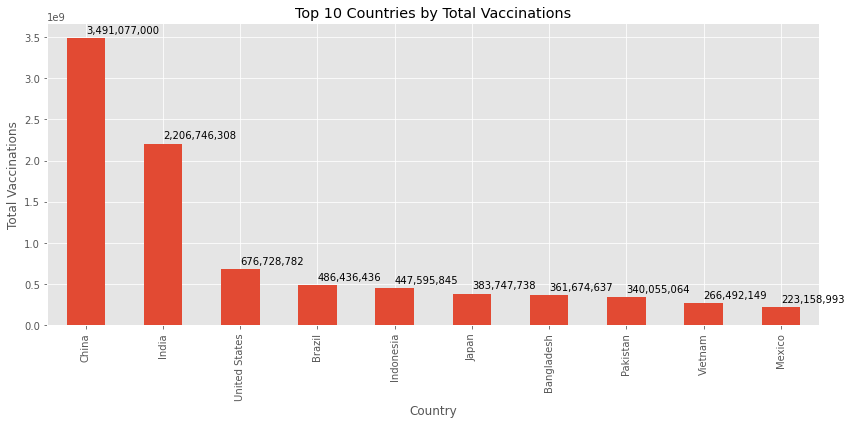

In [79]:

# Filter the data
tot_vaccination = df[df['continent'].notna()][['country', 'year', 'total_vaccinations']]

# Calculate total vaccinations per country
tot_vaccination = tot_vaccination.groupby('country')['total_vaccinations'].max()
tot_vacc = tot_vaccination.nlargest(10)

# Sort the data frame from lowest to highest total vaccinations
tot_vacc = tot_vacc.sort_values(ascending=False)

# Create the bar chart with sorted data
plt.figure(figsize=(12, 6))  # Adjust the figure size

tot_vacc.plot(kind='bar')  # Change chart type to bar

plt.title('Top 10 Countries by Total Vaccinations')
plt.ylabel('Total Vaccinations')
plt.xlabel('Country')

# Annotate the bar chart with values
for index, value in enumerate(tot_vacc):
    label = format(int(value), ',')
    plt.annotate(label, xy=(index, value), textcoords="offset points", xytext=(0, 5))

plt.tight_layout()

plt.show()


In [80]:

new_deaths_per_continent = df[df['continent'].isin(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceana'])][['continent', 'country', 'year', 'new_deaths']]

deaths_per_continent = new_deaths_per_continent.groupby('continent')['new_deaths'].sum().to_frame()

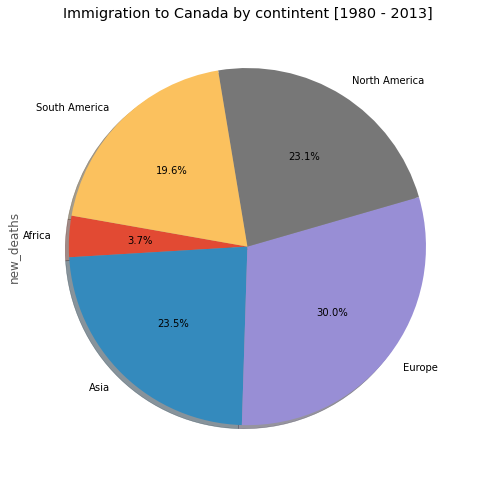

In [81]:
# autopct create %, start angle represent starting point
deaths_per_continent['new_deaths'].plot(kind = 'pie',
                            figsize = (8,9),
                            autopct = '%1.1f%%',
                            startangle = 170,
                            shadow = True
                           ) 

plt.title('Immigration to Canada by contintent [1980 - 2013]')

plt.show()

VISUALIZING THE DATA

In [82]:
# death counts per year

df_new_deaths = df[df['continent'].notna()][['country', 'year', 'new_deaths']]

deaths_per_year = df_new_deaths.groupby('year')['new_deaths'].sum()
deaths_per_year

year
2020    1936826
2021    3537444
2022    1247824
2023     246912
Name: new_deaths, dtype: int64

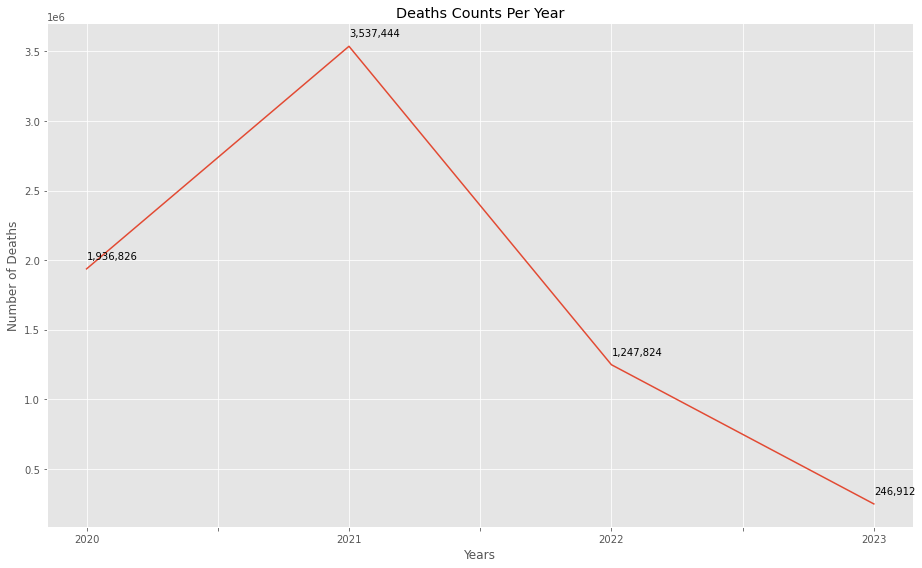

In [83]:

# Filter the data
df_new_deaths = df[df['continent'].notna()][['country', 'year', 'new_deaths']]

# Calculate deaths per year
deaths_per_year = df_new_deaths.groupby('year')['new_deaths'].sum()

# Create the line chart
plt.figure(figsize=(13, 8))

deaths_per_year.plot(kind='line')

plt.title('Deaths Counts Per Year')
plt.ylabel('Number of Deaths')
plt.xlabel('Years')

# Annotate the turning points
for index, value in enumerate(deaths_per_year):
    label = format(int(value), ',')
    plt.annotate(label, xy=(index, value), textcoords="offset points", xytext=(0, 10))

plt.tight_layout()

plt.show()


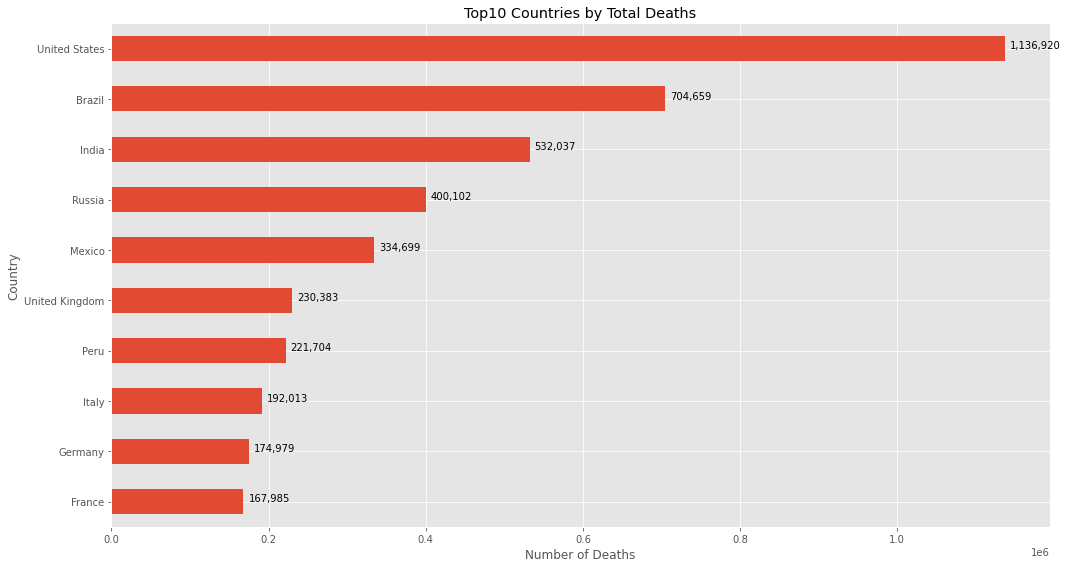

In [84]:

# Filter the data
df_new_deaths = df[df['continent'].notna()][['country', 'year', 'total_deaths']]

# Calculate deaths per country
deaths_per_country = df_new_deaths.groupby('country')['total_deaths'].max()
deaths_per_country = deaths_per_country.nlargest(10)

# Sort the data frame from lowest to highest total deaths
deaths_per_country = deaths_per_country.sort_values(ascending=True)
# Create the horizontal bar chart with sorted data
plt.figure(figsize=(15, 8))

deaths_per_country.plot(kind='barh')

plt.title('Top10 Countries by Total Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('Country')

# Annotate the bar chart with values
for index, value in enumerate(deaths_per_country):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value, index), textcoords="offset points", xytext=(5, 0))

plt.tight_layout()

plt.show()


In [94]:
deaths_per_year = df_new_deaths.groupby('year')['new_deaths'].sum()
deaths_per_year


year
2020    1936826
2021    3537444
2022    1247824
2023     246912
Name: new_deaths, dtype: int64

In [86]:
# Create a mask for the last row of each country
last_row_mask = df['country'] != df['country'].shift()

# Calculate the rolling sum of total deaths using the mask
df['rollingdeathcount2'] = df['new_cases'].groupby(last_row_mask.cumsum()).cumsum()

# Filter the data for rows where 'total_deaths' is greater than 0 and select specific columns
filtered_data = df[df['total_deaths'] > 0][['date', 'country', 'population', 'total_cases','new_deaths', 'total_deaths', 'rollingdeathcount2']]

filtered_data

,date,country,population,total_cases,new_deaths,total_deaths,rollingdeathcount2
81,2020-03-24,Afghanistan,41128772,40,1,1,40
82,2020-03-25,Afghanistan,41128772,42,0,1,42
83,2020-03-26,Afghanistan,41128772,74,0,1,74
84,2020-03-27,Afghanistan,41128772,74,0,1,74
85,2020-03-28,Afghanistan,41128772,80,1,2,80
...,...,...,...,...,...,...,...
349975,2023-10-14,Zimbabwe,16320539,265808,0,5718,265809
349976,2023-10-15,Zimbabwe,16320539,265808,0,5718,265809
349977,2023-10-16,Zimbabwe,16320539,265808,0,5718,265809
349978,2023-10-17,Zimbabwe,16320539,265808,0,5718,265809


<AxesSubplot:xlabel='new_deaths', ylabel='new_vaccinations'>

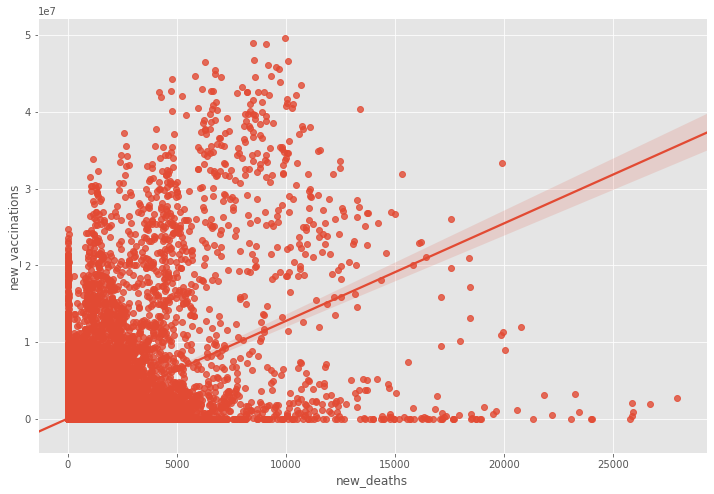

In [87]:
df_new_deaths = df[df['continent'].notna()][['country', 'year', 'total_deaths', 'new_deaths','new_vaccinations']]
correlation = df[['country','new_deaths','new_vaccinations']]
sns.regplot(x = correlation['new_deaths'], y = correlation['new_vaccinations'], data = correlation)

In [88]:
# the correlation between new_deaths and new_vaccinations
df.corr()['new_deaths']['new_vaccinations']

0.5256857510327023

In [89]:
df

,iso_code,continent,country,date,population,total_cases,new_cases,total_deaths,new_deaths,total_tests,...,total_boosters,new_vaccinations,population_density,year,Per_pop_infected,per_deaths_of_cases,per_infected,per_pop_death,rollingdeathcount,rollingdeathcount2
0,AFG,Asia,Afghanistan,2020-01-03,41128772,0,0,0,0,0,...,0,0,54.422,2020,0.0,NaN,0.00,0.000000,0,0
1,AFG,Asia,Afghanistan,2020-01-04,41128772,0,0,0,0,0,...,0,0,54.422,2020,0.0,NaN,0.00,0.000000,0,0
2,AFG,Asia,Afghanistan,2020-01-05,41128772,0,0,0,0,0,...,0,0,54.422,2020,0.0,NaN,0.00,0.000000,0,0
3,AFG,Asia,Afghanistan,2020-01-06,41128772,0,0,0,0,0,...,0,0,54.422,2020,0.0,NaN,0.00,0.000000,0,0
4,AFG,Asia,Afghanistan,2020-01-07,41128772,0,0,0,0,0,...,0,0,54.422,2020,0.0,NaN,0.00,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349975,ZWE,Africa,Zimbabwe,2023-10-14,16320539,265808,0,5718,0,0,...,0,0,42.729,2023,0.0,2.151177,1.63,0.035036,5720,265809
349976,ZWE,Africa,Zimbabwe,2023-10-15,16320539,265808,0,5718,0,0,...,0,0,42.729,2023,0.0,2.151177,1.63,0.035036,5720,265809
349977,ZWE,Africa,Zimbabwe,2023-10-16,16320539,265808,0,5718,0,0,...,0,0,42.729,2023,0.0,2.151177,1.63,0.035036,5720,265809
349978,ZWE,Africa,Zimbabwe,2023-10-17,16320539,265808,0,5718,0,0,...,0,0,42.729,2023,0.0,2.151177,1.63,0.035036,5720,265809


In [90]:
#!pip install folium==0.5.0
import folium


In [91]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

In [92]:
# Rename specific countries in the 'country' column
df.loc[df['country'] == 'United States', 'country'] = 'United States of America'
df.loc[df['country'] == 'Russia', 'country'] = 'Russian Federation'

# Filter the data and select relevant columns
filter_out_data = df[df['continent'].notna()][['country', 'total_deaths']]

# Create a DataFrame containing country and total deaths
covid_deaths = filter_out_data[['country', 'total_deaths']]

# Group the data by country and find the maximum total deaths per country
covid19_deaths = covid_deaths.groupby('country')['total_deaths'].max().to_frame()

# Reset the index of the resulting DataFrame
covid19_deaths = covid19_deaths.reset_index()

# Sort the data by 'total_deaths' column in descending order
covid19_deaths = covid19_deaths.sort_values(by='total_deaths', ascending=False)

# Display the resulting DataFrame
covid19_deaths


,country,total_deaths
230,United States of America,1136920
28,Brazil,704659
96,India,532037
177,Russian Federation,400102
135,Mexico,334699
...,...,...
155,North Korea,0
217,Tokelau,0
180,Saint Helena,0
211,Taiwan,0


In [93]:


world_geo = r'world_countries.json'

# create a numpy array of length 6 and has linear spacing from the minimum total immigration to the maximum total immigration
threshold_scale = np.linspace(covid19_deaths['total_deaths'].min(),
                              covid19_deaths['total_deaths'].max(),
                              5, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map.choropleth(
    geo_data=world_geo,
    data=covid19_deaths,
    columns=['country', 'total_deaths'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='World Covid19 Deaths',
    reset=True
)
world_map
